#                                       Bitcoin Data Analysis

### Importing the required packages

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


### Reading the data and performing some basic descriptive analysis

In [5]:
df = pd.read_csv(r"/Users/ishainja/Desktop/DA_P_2/bitcoin_price_Training - Training.csv")

In [6]:
df.head(3)

,Date,Open,High,Low,Close,Volume,Market Cap
0,"Jul 31, 2017",2763.24,2889.62,2720.61,2875.34,"860,575,000","45,535,800,000"
1,"Jul 30, 2017",2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000"
2,"Jul 29, 2017",2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000"


We can say that the data is time series data because the data is collected over a period of time

In [7]:
# To know what all features the dataset have
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap'], dtype='object')

In [8]:
df.shape

(1556, 7)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1556 entries, 0 to 1555
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        1556 non-null   object 
 1   Open        1556 non-null   float64
 2   High        1556 non-null   float64
 3   Low         1556 non-null   float64
 4   Close       1556 non-null   float64
 5   Volume      1556 non-null   object 
 6   Market Cap  1556 non-null   object 
dtypes: float64(4), object(3)
memory usage: 85.2+ KB


In [10]:
# the T does the transpose of the matrix
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,1556.0,582.625328,523.137312,68.50,254.2875,438.600,662.4375,2953.22
High,1556.0,597.992847,542.992855,74.56,260.3275,447.560,674.5250,2999.91
Low,1556.0,567.851446,505.877401,65.53,248.8350,430.570,646.7350,2840.53
Close,1556.0,584.239396,525.904442,68.43,254.3200,438.855,663.4025,2958.11


In [11]:
df.dtypes

Date           object
Open          float64
High          float64
Low           float64
Close         float64
Volume         object
Market Cap     object
dtype: object

In [12]:
df['Date'] = df['Date'].astype('datetime64[ns]')
# pd.to_datetime()

In [13]:
df['Date']

0      2017-07-31
1      2017-07-30
2      2017-07-29
3      2017-07-28
4      2017-07-27
          ...    
1551   2013-05-02
1552   2013-05-01
1553   2013-04-30
1554   2013-04-29
1555   2013-04-28
Name: Date, Length: 1556, dtype: datetime64[ns]

In [14]:
df['Date'].min()

Timestamp('2013-04-28 00:00:00')

In [15]:
df['Date'].max()

Timestamp('2017-07-31 00:00:00')

In [16]:
type(df['Date'][0])

pandas._libs.tslibs.timestamps.Timestamp

### Data Preprocessing

In [17]:
df.isnull().sum()

Date          0
Open          0
High          0
Low           0
Close         0
Volume        0
Market Cap    0
dtype: int64

In [18]:
df.duplicated().sum()

0

In [19]:
df.tail(5)

,Date,Open,High,Low,Close,Volume,Market Cap
1551,2013-05-02,116.38,125.60,92.28,105.21,-,"1,292,190,000"
1552,2013-05-01,139.00,139.89,107.72,116.99,-,"1,542,820,000"
1553,2013-04-30,144.00,146.93,134.05,139.00,-,"1,597,780,000"
1554,2013-04-29,134.44,147.49,134.00,144.54,-,"1,491,160,000"
1555,2013-04-28,135.30,135.98,132.10,134.21,-,"1,500,520,000"


In [20]:
data = df.sort_index(ascending=False).reset_index()

In [21]:
data

,index,Date,Open,High,Low,Close,Volume,Market Cap
0,1555,2013-04-28,135.30,135.98,132.10,134.21,-,"1,500,520,000"
1,1554,2013-04-29,134.44,147.49,134.00,144.54,-,"1,491,160,000"
2,1553,2013-04-30,144.00,146.93,134.05,139.00,-,"1,597,780,000"
3,1552,2013-05-01,139.00,139.89,107.72,116.99,-,"1,542,820,000"
4,1551,2013-05-02,116.38,125.60,92.28,105.21,-,"1,292,190,000"
...,...,...,...,...,...,...,...,...
1551,4,2017-07-27,2538.71,2693.32,2529.34,2671.78,"789,104,000","41,816,500,000"
1552,3,2017-07-28,2679.73,2897.45,2679.73,2809.01,"1,380,100,000","44,144,400,000"
1553,2,2017-07-29,2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000"
1554,1,2017-07-30,2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000"


In [22]:
data.drop('index',axis=1,inplace=True)

In [23]:
data

,Date,Open,High,Low,Close,Volume,Market Cap
0,2013-04-28,135.30,135.98,132.10,134.21,-,"1,500,520,000"
1,2013-04-29,134.44,147.49,134.00,144.54,-,"1,491,160,000"
2,2013-04-30,144.00,146.93,134.05,139.00,-,"1,597,780,000"
3,2013-05-01,139.00,139.89,107.72,116.99,-,"1,542,820,000"
4,2013-05-02,116.38,125.60,92.28,105.21,-,"1,292,190,000"
...,...,...,...,...,...,...,...
1551,2017-07-27,2538.71,2693.32,2529.34,2671.78,"789,104,000","41,816,500,000"
1552,2017-07-28,2679.73,2897.45,2679.73,2809.01,"1,380,100,000","44,144,400,000"
1553,2017-07-29,2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000"
1554,2017-07-30,2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000"


In [24]:
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap'], dtype='object')

### Analysing change in price of the bitcoin

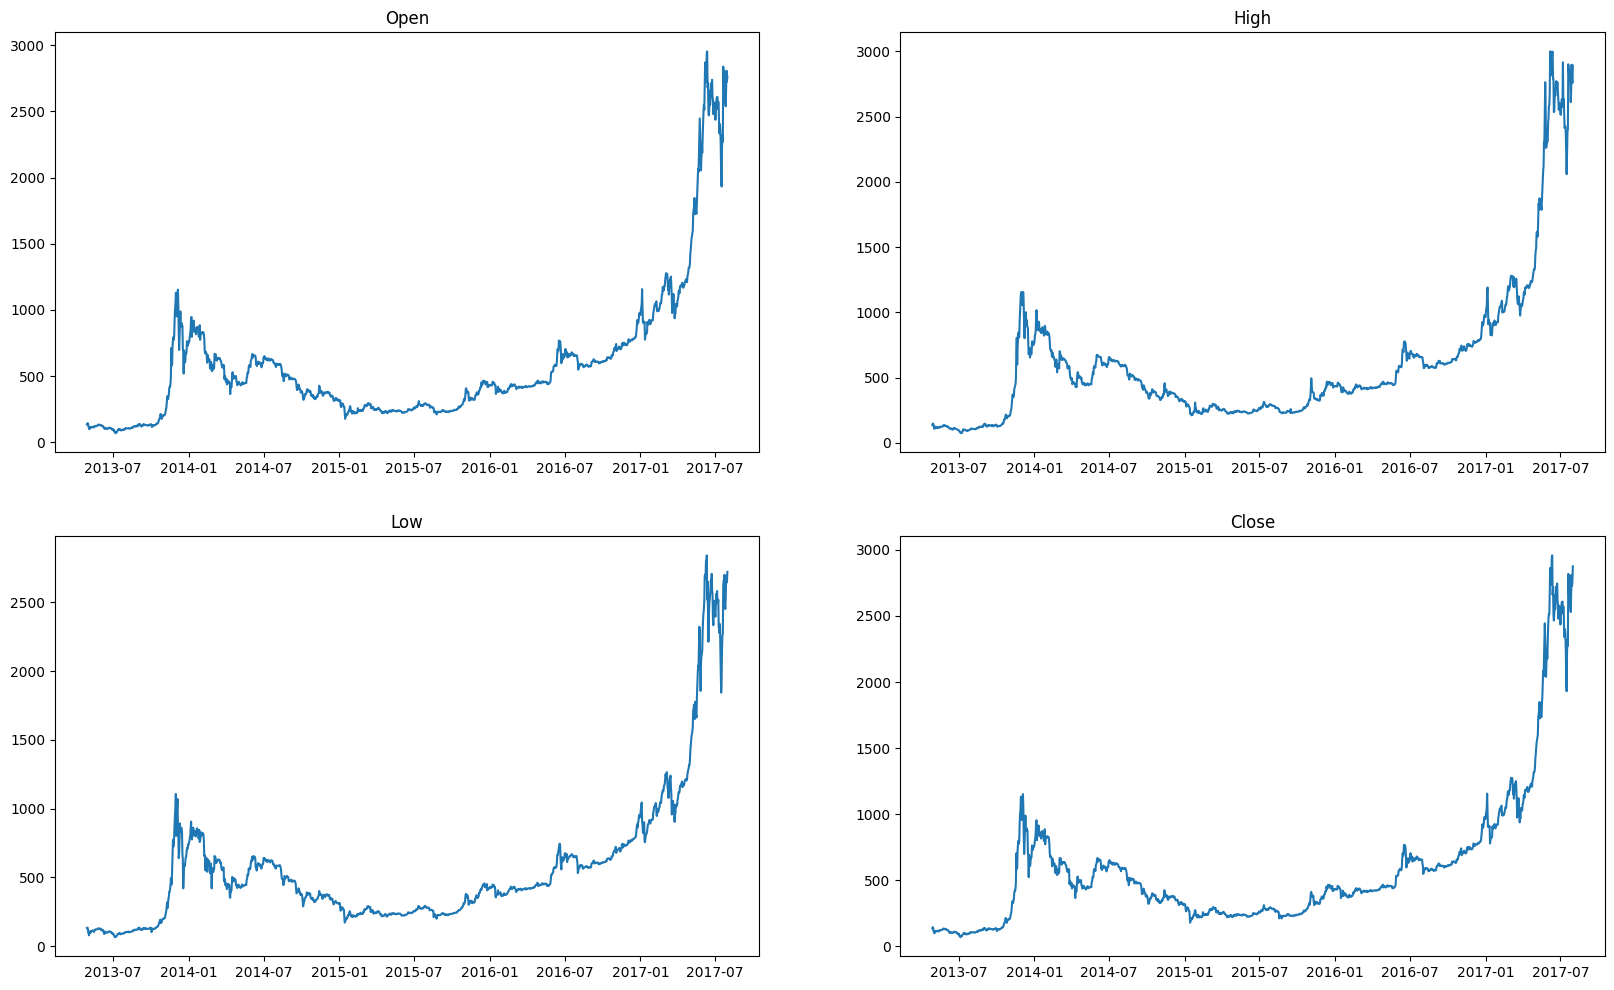

In [25]:
plt.figure(figsize=(20,12))
for index, col in enumerate(['Open', 'High', 'Low', 'Close'],1):
    plt.subplot(2,2,index)
    plt.plot(df['Date'],df[col])
    plt.title(col)

In [26]:
data.shape

(1556, 7)

In [27]:
bitcoin_sample = data[0:50]
bitcoin_sample

,Date,Open,High,Low,Close,Volume,Market Cap
0,2013-04-28,135.30,135.98,132.10,134.21,-,"1,500,520,000"
1,2013-04-29,134.44,147.49,134.00,144.54,-,"1,491,160,000"
2,2013-04-30,144.00,146.93,134.05,139.00,-,"1,597,780,000"
3,2013-05-01,139.00,139.89,107.72,116.99,-,"1,542,820,000"
4,2013-05-02,116.38,125.60,92.28,105.21,-,"1,292,190,000"
5,2013-05-03,106.25,108.13,79.10,97.75,-,"1,180,070,000"
6,2013-05-04,98.10,115.00,92.50,112.50,-,"1,089,890,000"
7,2013-05-05,112.90,118.80,107.14,115.91,-,"1,254,760,000"
8,2013-05-06,115.98,124.66,106.64,112.30,-,"1,289,470,000"
9,2013-05-07,112.25,113.44,97.70,111.50,-,"1,248,470,000"


In [28]:
!pip install chart_studio
!pip install plotly

### Analysing Bitcoin prices using Candle-Stick chart

In [29]:
import chart_studio.plotly as py

In [30]:
import plotly.graph_objs as go
import plotly.express as px
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [31]:
init_notebook_mode(connected=True)

In [32]:
trace = go.Candlestick(x=bitcoin_sample['Date'],
               high = bitcoin_sample['High'],
               open = bitcoin_sample['Open'],
              close = bitcoin_sample['Close'],
              low = bitcoin_sample['Low'])

In [33]:
candle_data = [trace]

layout = {
    'title' : 'Bitcoin Historical Price',
    'xaxis' : {'title':'Date'}
}

In [34]:
fig=go.Figure(data = candle_data , layout = layout)

fig.update_layout(xaxis_rangeslider_visible=False)
fig.show()

### Analysing closing prices in depth

<Axes: >

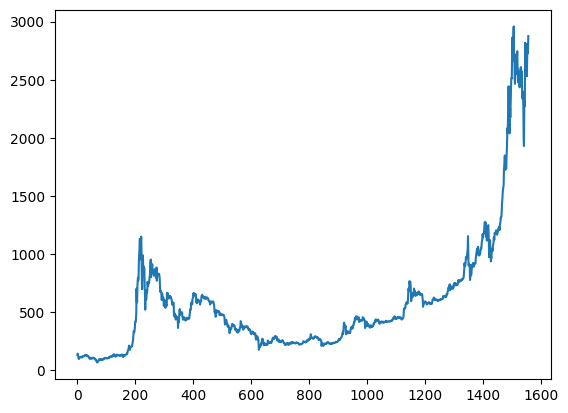

In [46]:
data['Close'].plot()

In [47]:
data.set_index('Date',inplace=True)

In [48]:
data

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2013-04-28,135.30,135.98,132.10,134.21,-,"1,500,520,000"
2013-04-29,134.44,147.49,134.00,144.54,-,"1,491,160,000"
2013-04-30,144.00,146.93,134.05,139.00,-,"1,597,780,000"
2013-05-01,139.00,139.89,107.72,116.99,-,"1,542,820,000"
2013-05-02,116.38,125.60,92.28,105.21,-,"1,292,190,000"
...,...,...,...,...,...,...
2017-07-27,2538.71,2693.32,2529.34,2671.78,"789,104,000","41,816,500,000"
2017-07-28,2679.73,2897.45,2679.73,2809.01,"1,380,100,000","44,144,400,000"
2017-07-29,2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000"


<Axes: xlabel='Date'>

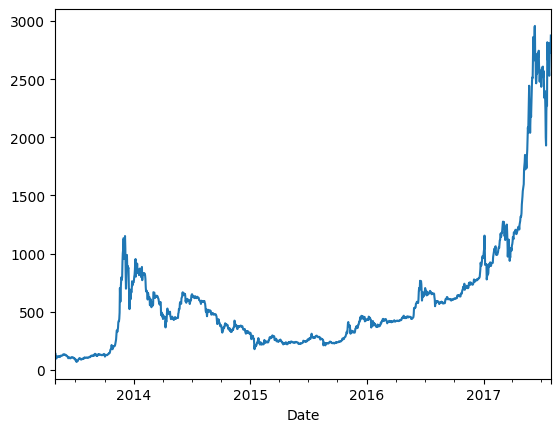

In [49]:
data['Close'].plot()

<Axes: xlabel='Date'>

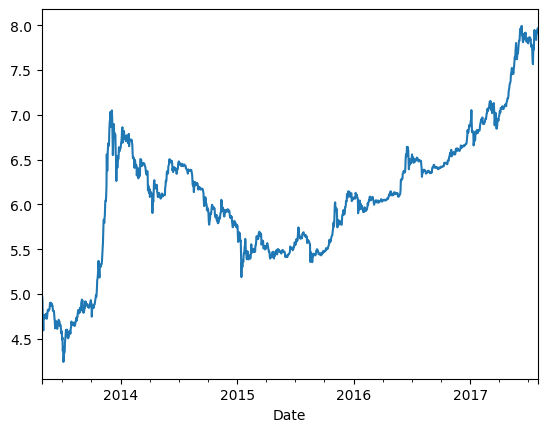

In [50]:
np.log1p(data['Close']).plot()

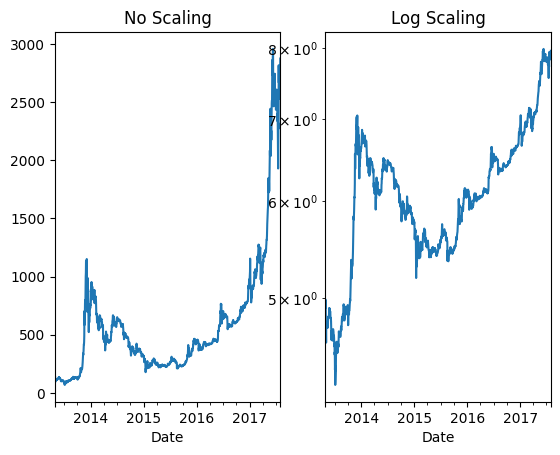

In [53]:
plt.subplot(1,2,1)
data['Close'].plot()
plt.title('No Scaling')

plt.subplot(1,2,2)
np.log1p(data['Close']).plot()
plt.title('Log Scaling')
plt.yscale('log')

### Perform Analysis on closing price on yearly, quarterly and monthly basis

In [55]:
data['Close'].resample('Y').mean()

Date
2013-12-31     257.474476
2014-12-31     527.236658
2015-12-31     272.453260
2016-12-31     568.492131
2017-12-31    1628.622123
Freq: A-DEC, Name: Close, dtype: float64

<Axes: xlabel='Date'>

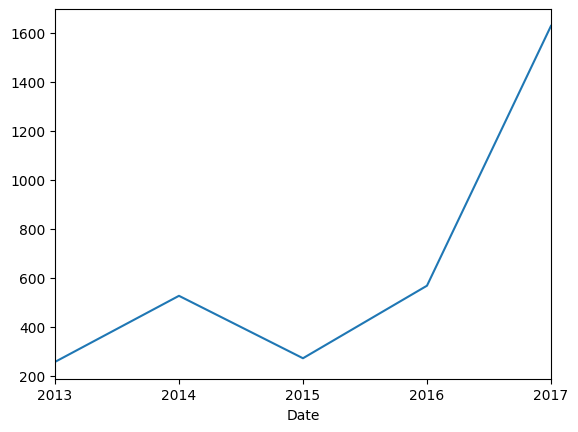

In [56]:
# The Y in resample indicates yearly plot
data['Close'].resample('Y').mean().plot()

 As we can observe that in 2017, we end up getting highest closing price

<Axes: xlabel='Date'>

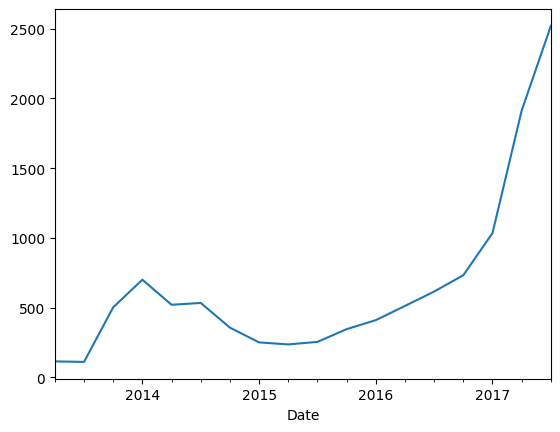

In [57]:
#Quaterly plot
data['Close'].resample('Q').mean().plot()

<Axes: xlabel='Date'>

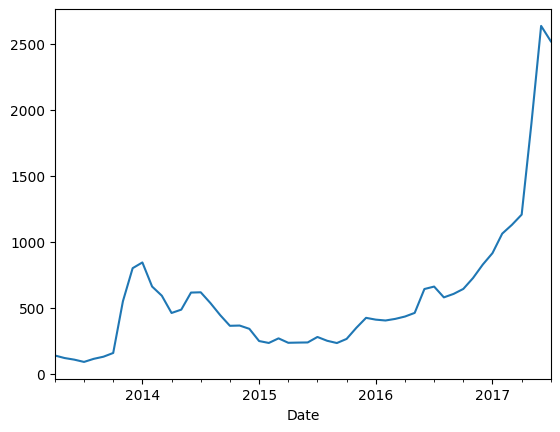

In [58]:
#monthly plot
data['Close'].resample('M').mean().plot()